# Pymaceuticals Inc.
---

### Analysis

-Tumor Volume increases as the weight increases for the Capomulin with a correlation of .84.
-Tumor Volume of mouse l509 decrease with treatment of Capomulin consistently until the 35th day of treatment. Tumor volume increases after the 35th day. 
 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results,
                            how ='outer', on='Mouse ID')
# Display the data table for preview
mouse_study_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Checking the number of mice.
number_of_mice = len(mouse_study_data["Mouse ID"].unique())
number_of_mice

249

In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID = mouse_study_data.loc[mouse_study_data.duplicated(subset= ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

In [25]:
# Optional: Get all the data for the duplicate mouse ID. 


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_mouse_study = mouse_study_data[mouse_study_data['Mouse ID'].isin(duplicate_mouse_ID) ==False]
clean_data_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(clean_data_mouse_study["Mouse ID"].unique())
number_of_mice

248

## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_vol= clean_data_mouse_study.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
tumor_med= clean_data_mouse_study.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
tumor_var= clean_data_mouse_study.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
tumor_std= clean_data_mouse_study.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
tumor_sem= clean_data_mouse_study.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']

summary_table= pd.DataFrame({"Mean Tumor Volume": tumor_vol,
                            "Median Tumor Volume": tumor_med,
                            "Tumor Volume Variance": tumor_var,
                            "Tumor Volume Std. Dev": tumor_std,
                            "Tumor Volume Std. Error.": tumor_sem})

summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Error.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_data_mouse_study.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)" : [np.mean, np.median, np.var, np.std, st.sem]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

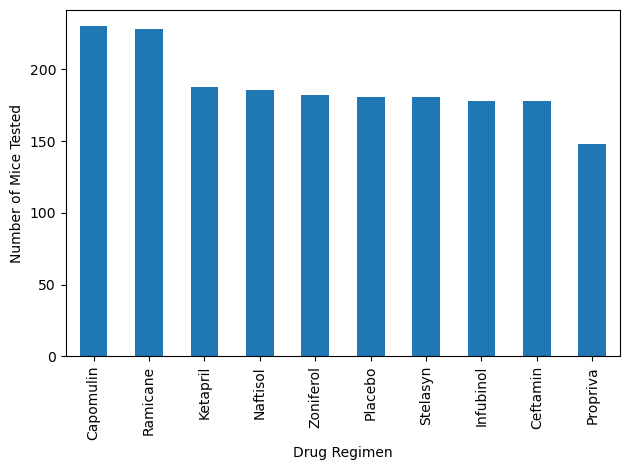

In [31]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen_count = clean_data_mouse_study["Drug Regimen"].value_counts()

drug_regimen_chart = drug_regimen_count.plot(kind="bar")
drug_regimen_chart.set_xlabel("Drug Regimen")
drug_regimen_chart.set_ylabel("Number of Mice Tested")

plt.show
plt.tight_layout()

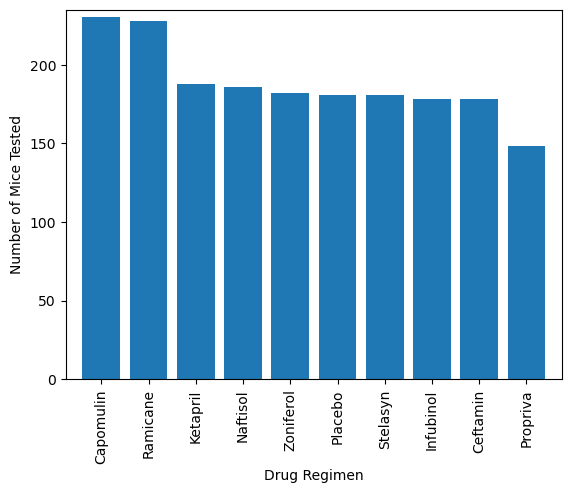

<Figure size 640x480 with 0 Axes>

In [36]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
number_of_mice = clean_data_mouse_study["Drug Regimen"].value_counts()

#set x
drug_type = np.arange(len(number_of_mice))
#graph results
plt.bar(drug_type, number_of_mice)
plt.xticks(drug_type, rotation = "vertical")

tick_location = [value for value in drug_type]
plt.xticks(tick_location, number_of_mice.index.values)

plt.xlim(-0.75, len(drug_type)-0.25)
plt.ylim(0, max(number_of_mice)+5)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")



plt.show()
plt.tight_layout()


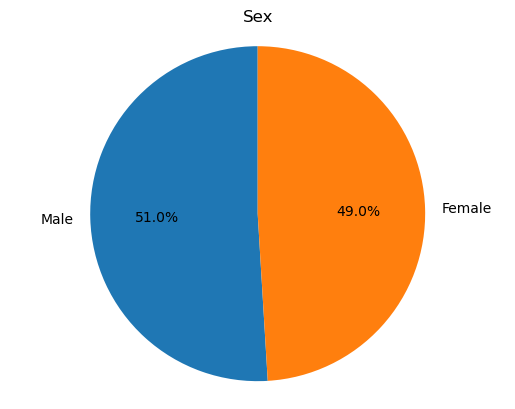

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

male_vs_female = clean_data_mouse_study["Sex"].value_counts()

plt.pie(male_vs_female, labels = male_vs_female.index.values, autopct="%1.1f%%", startangle = 90)

plt.axis("equal")
plt.title("Sex")

plt.show()

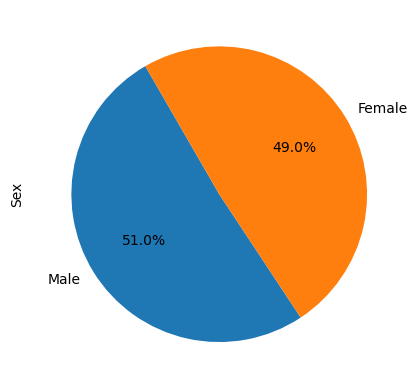

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_vs_female = clean_data_mouse_study["Sex"].value_counts()

pie_plot = male_vs_female.plot.pie(autopct = "%1.1f%%", startangle=120)


## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
by_mouse = clean_data_mouse_study.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(clean_data_mouse_study,on=['Mouse ID','Timepoint'],how="left")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = [] 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_list.append(final_tumor_vol)
    
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq= quartiles[0.75]
    iqr = upperq-lowerq
    
    
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The median is: {quartiles[0.5]}")
   
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    outlier_occupancy = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outlier_occupancy}")
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The median is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
The median is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
The median is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
The lower quartile is: 48

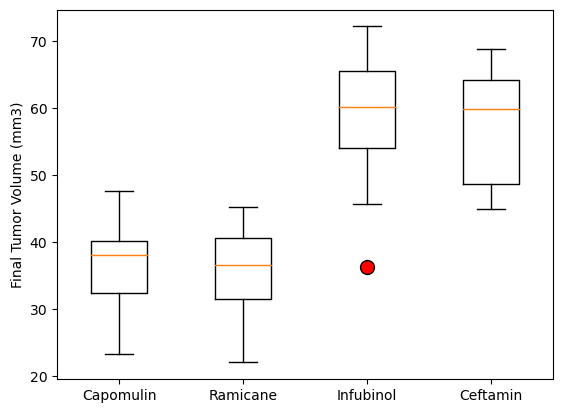

In [50]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor = "red", markersize=10)
plt.boxplot(tumor_vol_list, labels = treatments, flierprops = orange_out)
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse l509')

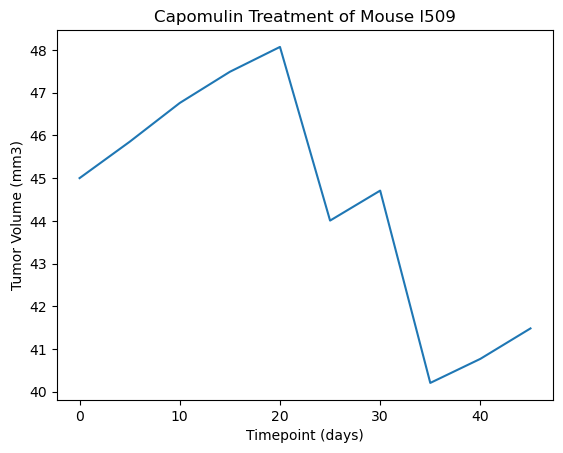

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_table = clean_data_mouse_study.loc[clean_data_mouse_study["Drug Regimen"] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table["Mouse ID"] == "l509"]
plt.plot(mousedata["Timepoint"],mousedata["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")


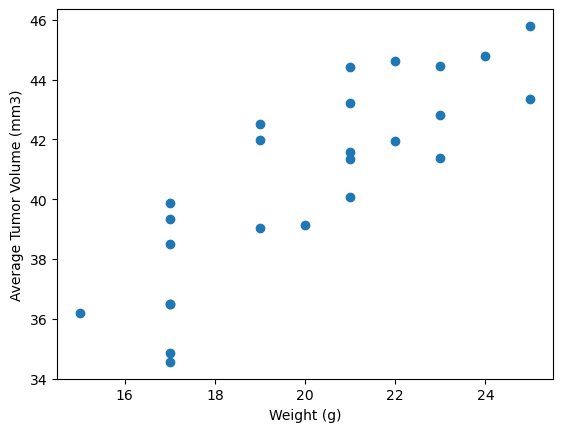

In [54]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_table = clean_data_mouse_study.loc[clean_data_mouse_study["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin_table.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


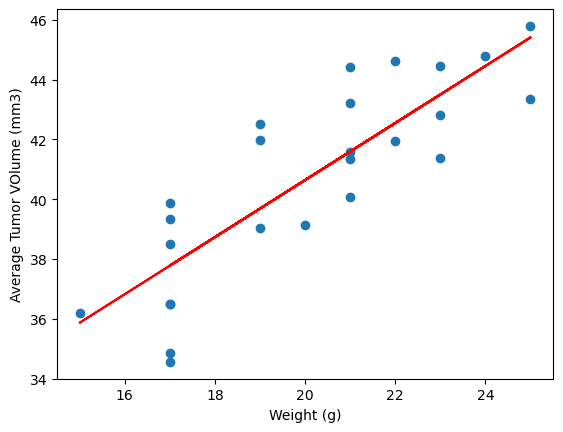

In [56]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

model= st.linregress(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])

y_values = capomulin_avg["Weight (g)"]*model[0]+model[1]   
plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
plt.plot(capomulin_avg["Weight (g)"], y_values, color="red") 
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor VOlume (mm3)")
      
plt.show()      
